In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os
import numpy as np
import tensorflow as tf
import cv2

import keras
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
image_path = '\\Users\\Paul-DS\\Downloads\\Final_Project\\all_images'
categs = os.listdir(image_path)

In [3]:
data=[]
labels=[]
categories = []
i = 0
#categs = os.listdir(image_path)
for categ in categs:
    #print(categ)
    categories.append([i,categ])
    animalpics = os.listdir(image_path + "\\" + categ)
    #print(animalpics)
    for animalpic in animalpics:
        #print(animalpic)
        try:
            #print(image_path + "\\" + categ + "\\original\\" + animalpic)
            animal_image = cv2.imread(image_path + "\\" + categ + "\\" + animalpic)
            #print(animal_image)
            #new_array = cv2.resize(img_array, (50, 50))
            img_from_ar = Image.fromarray(animal_image)
            resized_image = img_from_ar.resize((50, 50))
            data.append(np.array(resized_image))
            #training_data.append([new_array, class_num])  # add this to our training_data
            labels.append(i)
            #print(data)
            #print(labels)
        except:
            pass
    i = i +1

In [4]:
print(categories)

[[0, 'bats'], [1, 'ducks'], [2, 'penguins'], [3, 'rhinos'], [4, 'spiders'], [5, 'turtles']]


In [5]:
animals=np.array(data)
labels=np.array(labels)
#animals=np.array(data)
#labels=np.array(labels)

In [6]:
s=np.arange(animals.shape[0])
np.random.shuffle(s)
animals=animals[s]
labels=labels[s]

In [7]:
s

array([1597,   17, 2139, ...,  285, 1252, 1822])

In [7]:
num_classes=len(np.unique(labels))
data_length=len(animals)

In [8]:
(x_train,x_test)=animals[(int)(0.1*data_length):],animals[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [9]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

In [10]:
from keras.utils import np_utils
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [71]:
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [74]:
vgg19_conv_base = VGG19(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])

In [11]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense((i),activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
__________

In [72]:
# Our Original Homemade Model
len(model.trainable_weights)

10

In [75]:
# VGG19 Pretrained Model
len(vgg19_conv_base.trainable_weights)

32

In [76]:
# We freeze the trainable layers so we can only use its 
# Pretrained Features of ots Convolutional Base
# to if it improves our predictions!
vgg19_conv_base.trainable = False

In [77]:
# This shows we froze them
len(vgg19_conv_base.trainable_weights)

0

In [80]:
# Now include VGG19 Convolutional Base inside our Original Model
model=Sequential()
# Add VGG19
model.add(vgg19_conv_base)
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=x_train.shape[1:]))
# Remove because MaxPooling because it causes 
# Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_4/MaxPool'
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
#model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense((i),activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 32)          65568     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 64)          8256      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 64)          16448     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
__________

In [12]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
                  metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,batch_size=25
          ,epochs=80, verbose=1, validation_data=(x_test, y_test))

Train on 6693 samples, validate on 743 samples
Epoch 1/80
6693/6693 [==============================] - 15s 2ms/step - loss: 1.7842 - acc: 0.1918 - val_loss: 1.7721 - val_acc: 0.2261
Epoch 2/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.7610 - acc: 0.2244 - val_loss: 1.7397 - val_acc: 0.2692
Epoch 3/80
6693/6693 [==============================] - 17s 2ms/step - loss: 1.7302 - acc: 0.2668 - val_loss: 1.7103 - val_acc: 0.3015
Epoch 4/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.7029 - acc: 0.2712 - val_loss: 1.6839 - val_acc: 0.3109
Epoch 5/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.6799 - acc: 0.3011 - val_loss: 1.6447 - val_acc: 0.3620
Epoch 6/80
6693/6693 [==============================] - 18s 3ms/step - loss: 1.6583 - acc: 0.3154 - val_loss: 1.6348 - val_acc: 0.3526
Epoch 7/80
6693/6693 [==============================] - 18s 3ms/step - loss: 1.6363 - acc: 0.3283 - val_loss: 1.6027 - val_acc: 0.3849
Epoch 8/

6693/6693 [==============================] - 17s 3ms/step - loss: 1.1917 - acc: 0.5440 - val_loss: 1.1863 - val_acc: 0.5559
Epoch 61/80
6693/6693 [==============================] - 16s 2ms/step - loss: 1.1901 - acc: 0.5418 - val_loss: 1.2437 - val_acc: 0.5276
Epoch 62/80
6693/6693 [==============================] - 17s 2ms/step - loss: 1.1837 - acc: 0.5519 - val_loss: 1.1788 - val_acc: 0.5585
Epoch 63/80
6693/6693 [==============================] - 16s 2ms/step - loss: 1.1800 - acc: 0.5533 - val_loss: 1.1746 - val_acc: 0.5680
Epoch 64/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.1765 - acc: 0.5583 - val_loss: 1.1742 - val_acc: 0.5559
Epoch 65/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.1611 - acc: 0.5555 - val_loss: 1.1674 - val_acc: 0.5760
Epoch 66/80
6693/6693 [==============================] - 17s 3ms/step - loss: 1.1744 - acc: 0.5489 - val_loss: 1.1746 - val_acc: 0.5693
Epoch 67/80
6693/6693 [==============================] - 17s

In [11]:
from keras import optimizers

#model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
                  metrics=['accuracy'])

In [12]:
#history = model.fit(x_train,y_train,batch_size=25
          ,epochs=80, verbose=1, validation_data=(x_test, y_test))

Train on 5984 samples, validate on 664 samples
Epoch 1/80
5984/5984 [==============================] - 27s 5ms/step - loss: 1.7208 - acc: 0.2945 - val_loss: 1.6647 - val_acc: 0.3870
Epoch 2/80
5984/5984 [==============================] - 27s 4ms/step - loss: 1.6805 - acc: 0.3234 - val_loss: 1.6155 - val_acc: 0.3961
Epoch 3/80
5984/5984 [==============================] - 27s 4ms/step - loss: 1.6271 - acc: 0.3549 - val_loss: 1.5699 - val_acc: 0.4021
Epoch 4/80
5984/5984 [==============================] - 26s 4ms/step - loss: 1.5928 - acc: 0.3630 - val_loss: 1.5312 - val_acc: 0.4021
Epoch 5/80
5984/5984 [==============================] - 27s 4ms/step - loss: 1.5648 - acc: 0.3663 - val_loss: 1.5016 - val_acc: 0.4036
Epoch 6/80
5984/5984 [==============================] - 26s 4ms/step - loss: 1.5389 - acc: 0.3755 - val_loss: 1.4866 - val_acc: 0.4127
Epoch 7/80
5984/5984 [==============================] - 27s 4ms/step - loss: 1.5077 - acc: 0.3959 - val_loss: 1.4479 - val_acc: 0.4051
Epoch 8/

Epoch 61/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0674 - acc: 0.5924 - val_loss: 1.0901 - val_acc: 0.6160
Epoch 62/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0571 - acc: 0.6003 - val_loss: 1.0672 - val_acc: 0.6054
Epoch 63/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0551 - acc: 0.5989 - val_loss: 1.0709 - val_acc: 0.6160
Epoch 64/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0446 - acc: 0.6101 - val_loss: 1.0550 - val_acc: 0.6114
Epoch 65/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0493 - acc: 0.6011 - val_loss: 1.0692 - val_acc: 0.6295
Epoch 66/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0336 - acc: 0.6113 - val_loss: 1.0609 - val_acc: 0.6130
Epoch 67/80
5984/5984 [==============================] - 14s 2ms/step - loss: 1.0343 - acc: 0.6108 - val_loss: 1.0704 - val_acc: 0.5873
Epoch 68/80
5984/5984 [=========================

In [16]:
#model.save('5984imgs_small_project_cnn_32_64_64_16_25_80.h5')
model.save('FEB042019_820PM_final_custom_cnn_32_64_64_16_25_80.h5')

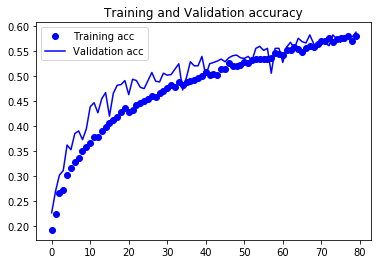

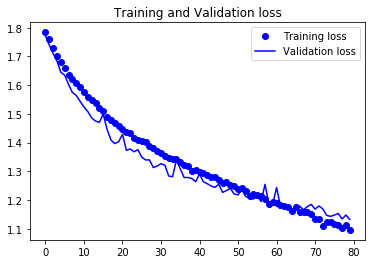

In [22]:
# 25, 80 -> IMAGES Trained=6693, Test=743 NOW 32, 64, 64, 16

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.savefig('final_curve_fit_loss.png')
plt.show()

In [18]:
plt.savefig('final_curve_fit.jpg')

<Figure size 432x288 with 0 Axes>

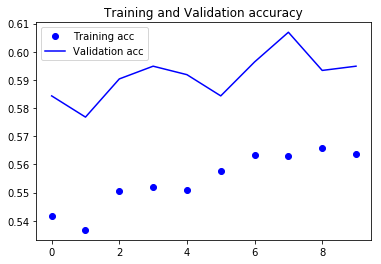

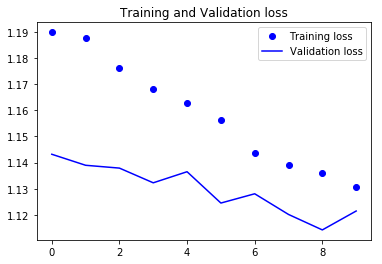

In [100]:
# 30, 10 -> VGG19, 32, 64, 64, 16

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

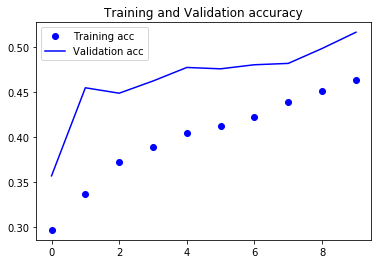

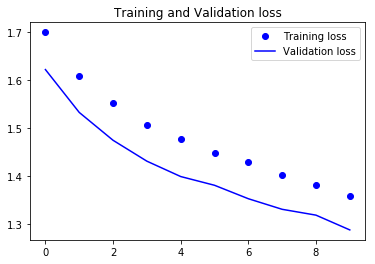

In [86]:
# 25, 10 -> VGG19, 32, 64, 64, 16

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

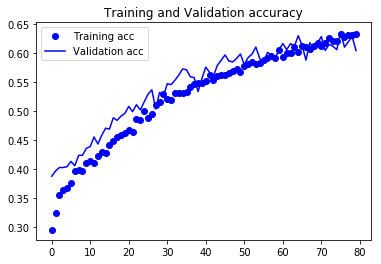

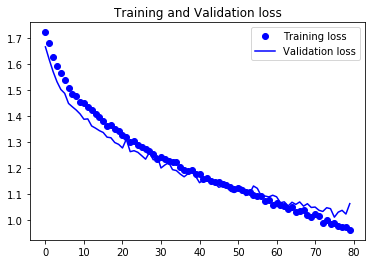

In [13]:
# 25, 80 -> 32, 64, 64, 16 -> GOOD FIT

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

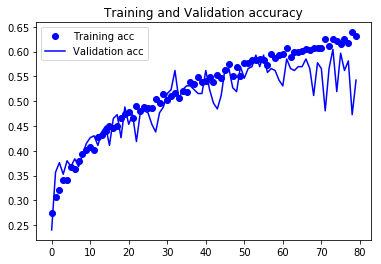

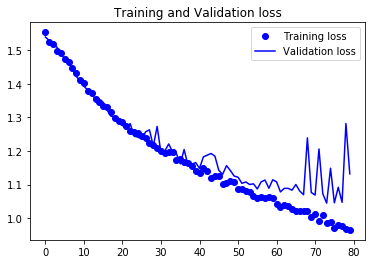

In [17]:
# 27, 80 -> 32, 64, 64, 16 ->

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

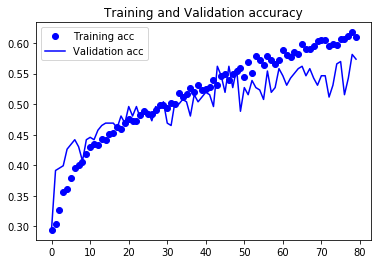

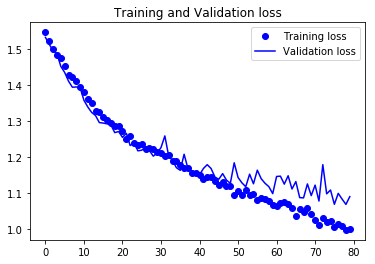

In [13]:
# 27, 80 -> 32, 64, 64, 16 ->

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

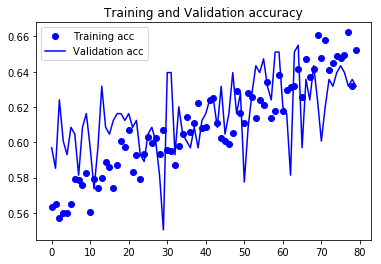

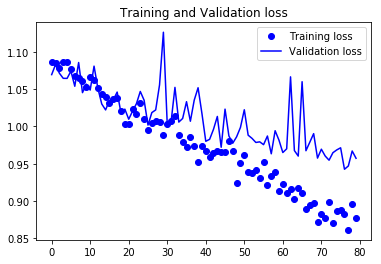

In [42]:
# 30, 80 -> 32, 64, 64, 16 ->

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

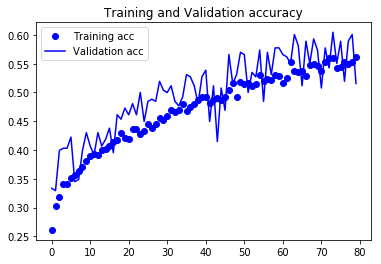

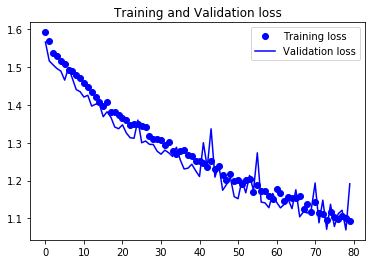

In [19]:
# 25, 80 -> 32, 64, 64, 16 ->MUCH BETTER FIT !!!!

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

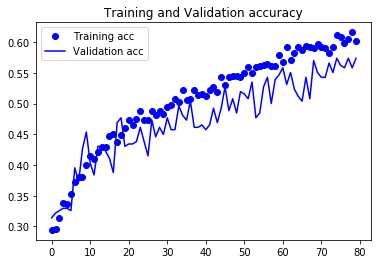

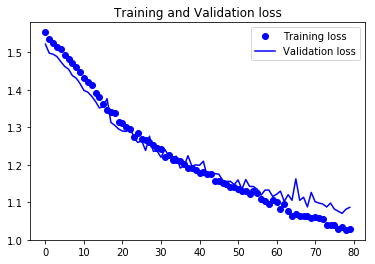

In [14]:
# 50, 80 -> 32, 64, 64, 16 ->

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

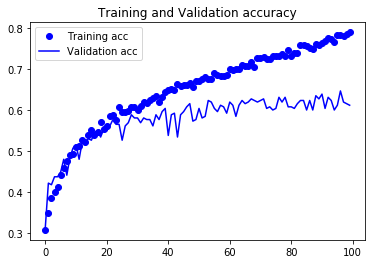

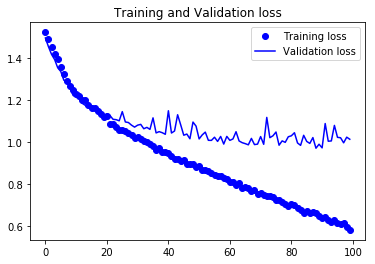

In [23]:
# 50, 100 -> 32, 64, 96, 128 -> overfitted

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

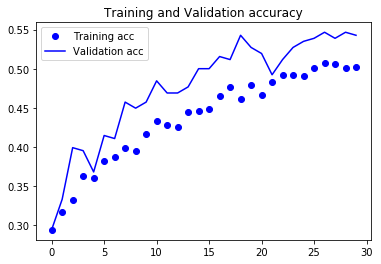

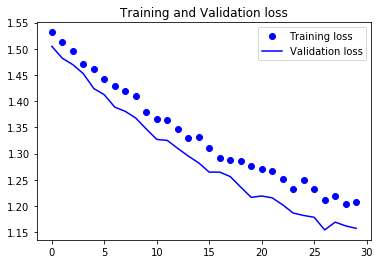

In [19]:
# 17, 30 -> 32, 64, 96, 128 -> Underfitting

# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

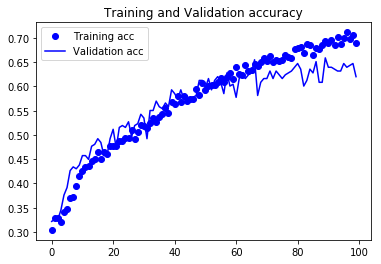

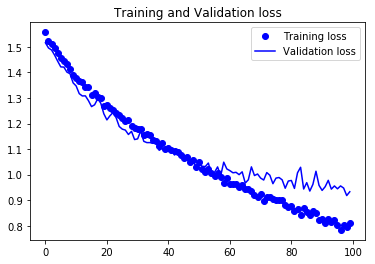

In [15]:
# 16, 100 -> 96, 64, 32, 16 -> 
# This nearly matches page 142 of DEEP LEARNING WITH PYTHON: Deep Learning for Computer Vision
# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

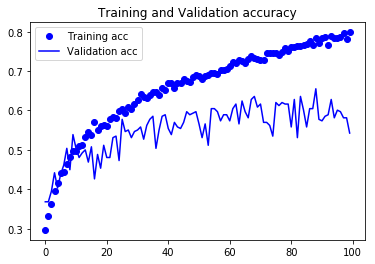

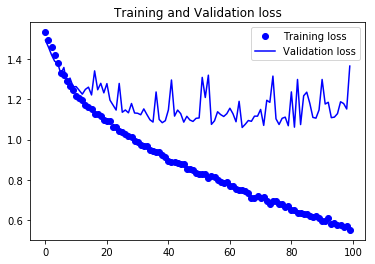

In [14]:
# 15, 100 -> 96, 64, 64, 32 -> OVERFIT
# This nearly matches page 142 of DEEP LEARNING WITH PYTHON: Deep Learning for Computer Vision
# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

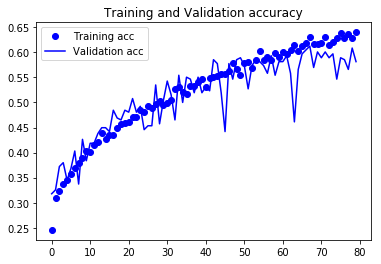

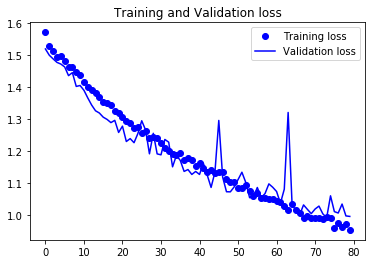

In [13]:
# 15, 80 -> LOOKS GOOD
# This nearly matches page 142 of DEEP LEARNING WITH PYTHON: Deep Learning for Computer Vision
# Model saved here!
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

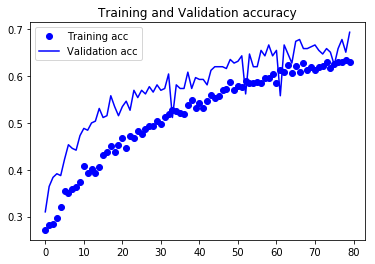

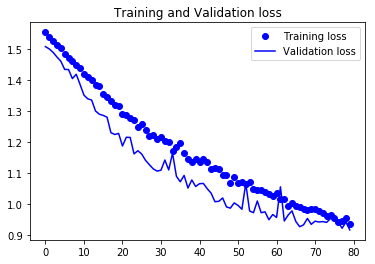

In [13]:
# 17, 80 -> underfitted

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

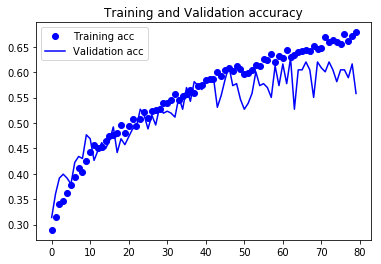

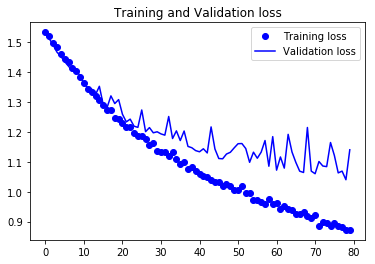

In [16]:
# 18, 80 -> training data follows validation uptil 
# 40 epochs

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

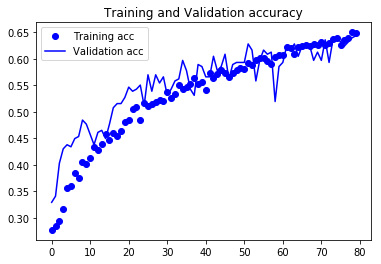

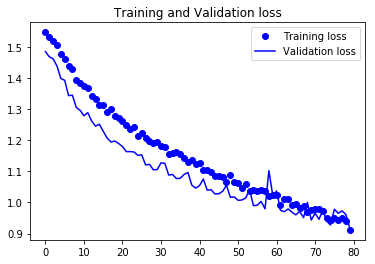

In [13]:
# 16, 80 -> overfitting

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

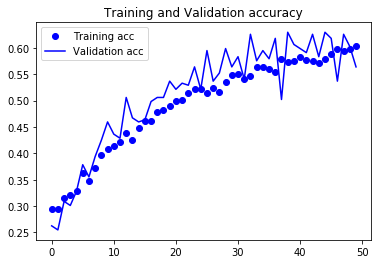

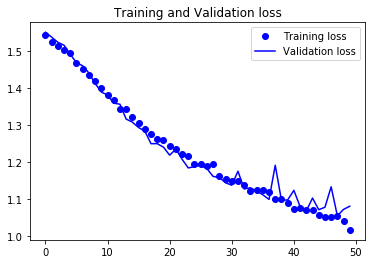

In [13]:
#previous with 17, 50

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

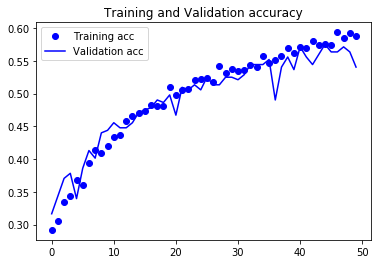

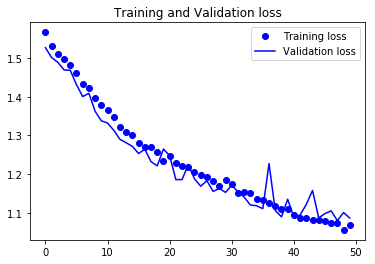

In [25]:
# Previous Curve Fit
# epoch 50 and batchsize 17

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [14]:
eval_score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', eval_score[1])

664/664 [==============================] - 0s 663us/step

 Test accuracy: 0.6039156633687307


In [87]:
eval_score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', eval_score[1])

664/664 [==============================] - 10s 15ms/step

 Test accuracy: 0.516566265060241


In [ ]:
# CHANGING OPTIMIZER FROM ADAM TO RMSPROP INCREASED TEST ACCURACY FROM 0.57 TO 0.61 !!!!

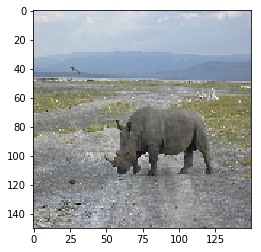

In [88]:
from keras.preprocessing import image
image_size = (150, 150)
# Load the image and resize to default image size
test_image_path = os.path.join("..", "Downloads\\Images", "rhino2.jpg")
img = image.load_img(test_image_path, target_size=image_size)
np.expand_dims(img_)
plt.imshow(img)

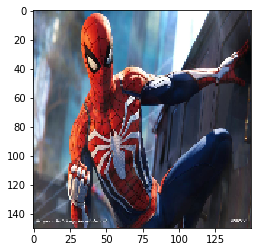

In [62]:
from keras.preprocessing import image
image_size = (150, 150)
# Load the image and resize to default image size
test_image_path = os.path.join("..", "Downloads\\Images", "spiderman2.jpg")
img = image.load_img(test_image_path, target_size=image_size)
plt.imshow(img)

In [63]:
#print("Predicting .................................")
#ar=convert_to_array(img)
im = cv2.imread(test_image_path)
img = Image.fromarray(im)
image2 = img.resize((50, 50))
ar = np.array(image2)
ar=ar/255
label=1
a=[]
a.append(ar)
a=np.array(a)

In [27]:
score

array([[0.5033602 , 0.17987148, 0.15731515, 0.04684172, 0.11261137]],
      dtype=float32)

In [35]:
label_index=np.argmax(score)
print(label_index)

4


1/1 [==============================] - 0s 32ms/step


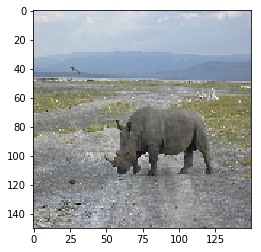

In [91]:
# Make predictions
score = model.predict(a, verbose=1)
#print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [92]:
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['bats', 0.4465932250022888],
 ['spiders', 0.29944300651550293],
 ['ducks', 0.14492003619670868],
 ['rhinos', 0.07741781324148178],
 ['penguins', 0.022221647202968597],
 ['turtles', 0.009404325857758522]]

1/1 [==============================] - 0s 0us/step


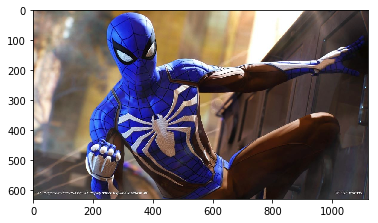

In [64]:
# Make predictions
score = model.predict(a, verbose=1)
#print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [65]:
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['spiders', 0.4412107765674591],
 ['bats', 0.346381813287735],
 ['ducks', 0.11544472724199295],
 ['rhinos', 0.07321298122406006],
 ['penguins', 0.014670991338789463],
 ['turtles', 0.009078730829060078]]

In [65]:
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['spiders', 0.4412107765674591],
 ['bats', 0.346381813287735],
 ['ducks', 0.11544472724199295],
 ['rhinos', 0.07321298122406006],
 ['penguins', 0.014670991338789463],
 ['turtles', 0.009078730829060078]]

In [18]:
# BEFORE DID 33% rhino head shoulder image with ball in mouth IMAGE !!!
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['rhinos', 0.8923249840736389],
 ['bats', 0.06158856675028801],
 ['spiders', 0.024648744612932205],
 ['ducks', 0.019655680283904076],
 ['penguins', 0.0015883921878412366],
 ['turtles', 0.00019362354942131788]]

In [56]:
# DID 59% ON man standing in front of ducks with Duck Mask IMAGE !!!
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['ducks', 0.5892648696899414],
 ['spiders', 0.16881771385669708],
 ['bats', 0.13873018324375153],
 ['penguins', 0.10242778062820435],
 ['rhinos', 0.0007594334310851991]]

In [48]:
# DID ALMOST 92% ON FOX BAT1 IMAGE !!!
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['bats', 0.917772114276886],
 ['spiders', 0.04581453278660774],
 ['ducks', 0.026621174067258835],
 ['penguins', 0.00857544131577015],
 ['rhinos', 0.0012168363900855184]]

In [32]:
# DID 88% ON BAT WINGS IMAGE !!!!
# List all Prediction Scores
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['bats', 0.8815242052078247],
 ['ducks', 0.0776495486497879],
 ['spiders', 0.031385038048028946],
 ['penguins', 0.009417659603059292],
 ['rhinos', 2.3544023861177266e-05]]

In [37]:
acc_score=np.max(score)
print(acc_score)

0.29894942


In [38]:
print("The predicted Animal is a "+categories[label_index][1]+" with accuracy =    "+str(acc_score))

The predicted Animal is a spiders with accuracy =    0.29894942


In [62]:
# check the layers by name
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 conv2d_7
1 max_pooling2d_4
2 conv2d_8
3 max_pooling2d_5
4 conv2d_9
5 max_pooling2d_6
6 dropout_3
7 flatten_2
8 dense_3
9 dropout_4
10 dense_4


In [63]:
# Refernced from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb
from keras import backend as K

# This is the "flying fox bat" entry in the prediction vector
bat_output = model.output[:, np.argmax(score[0])]

In [64]:
bat_output

<tf.Tensor 'strided_slice:0' shape=(?,) dtype=float32>

In [65]:
# The is the output feature map of
# the last convolutional layer
last_conv_layer = model.get_layer(index=6)

In [66]:
last_conv_layer

In [67]:
# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(bat_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([a])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(16):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

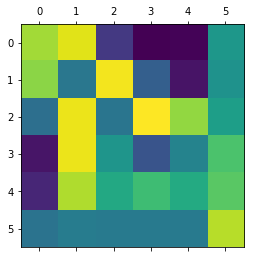

In [68]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [69]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(test_image_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('/Users/Paul-DS/Downloads/bat_wings_heatmap.jpg', superimposed_img)

True

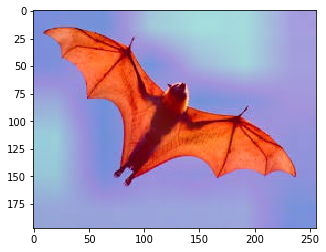

In [70]:
from keras.preprocessing import image
# show superimposed image
heat_map_image = image.load_img('/Users/Paul-DS/Downloads/bat_wings_heatmap.jpg')
plt.imshow(heat_map_image)

In [ ]:
# Data Augmentation
# References:
# (1) 'Generate batches of tensor image data with real-time data augmentation' ->
#          https://keras.io/preprocessing/image/
# (2) https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# (3) https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

In [72]:
# Started new MODEL for augmentation testing with Panther and Foxbat data
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# add a Dropout layer to our model, right before the densely-connected classifier
# to defend against Overfitting
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       73856     
__________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '\\Users\\Paul-DS\\Downloads\\Final_Project\\train'
validation_dir = '\\Users\\Paul-DS\\Downloads\\Final_Project\\validation'

# train our network using data augmentation and dropout:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('small_project_cnn.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))